In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [33]:
import textstat
from glob import glob

In [39]:
# datasets used
df1 = pd.read_csv('./FE_df1.csv')
rtweets = pd.read_csv('./russian_tweets.csv', index_col=0)
ted = pd.read_csv('./ted.csv')
with open('./sisyphus_essay.txt', 'r') as f:
    sisyphus = f.read()
    
txt_files = glob('./*.txt')
publications = ['forbes', 'harvard_law', 'r_digest', 'time_kids']

pubs = []
for file in txt_files:
    for pub in publications:
        if pub in file:
            with open(file, 'r', encoding='utf-8') as f:
                pubs.append(f.read())
forbes, harvard, digest, time_kids = pubs

# Introduction to NLP feature engineering

## One-hot encoding

In [3]:
df1.head()

,feature 1,feature 2,feature 3,feature 4,feature 5,label
0,29.0000,0,0,211.3375,female,1
1,0.9167,1,2,151.5500,male,1
2,2.0000,1,2,151.5500,female,0
3,30.0000,1,2,151.5500,male,0
4,25.0000,1,2,151.5500,female,0


In [5]:
# perform one-hot encoding
df1_ = pd.get_dummies(df1, columns=['feature 5'])
df1_.head()

,feature 1,feature 2,feature 3,feature 4,label,feature 5_female,feature 5_male
0,29.0000,0,0,211.3375,1,1,0
1,0.9167,1,2,151.5500,1,0,1
2,2.0000,1,2,151.5500,0,1,0
3,30.0000,1,2,151.5500,0,0,1
4,25.0000,1,2,151.5500,0,1,0


# Basic feature extraction

## Character count of russian tweets

In [9]:
rtweets.head()

,content
127447,LIVE STREAM VIDEO=> Donald Trump Rallies in Co...
123642,Muslim Attacks NYPD Cops with Meat Cleaver. Me...
226970,.@vfpatlas well that's a swella word there (di...
138339,RT wehking_pamela: Bobby_Axelrod2k MMFlint don...
161610,Жители обстреливаемых районов Донецка проводят...


In [13]:
rtweets_ = rtweets.copy()
# create a new feature char_count that counts the characters in a tweet
rtweets_['char_count'] = rtweets_['content'].apply(len)

print(f"average char count: {rtweets_['char_count'].mean()}")

average char count: 103.462


Notice that the average character count of these tweets is approximately 104, which is much higher than the overall average tweet length of around 40 characters (**this may be outdated**). Depending on what you're working on, this may be something worth investigating into. For your information, there is research that indicates that fake news articles tend to have longer titles! Therefore, even extremely basic features such as character counts can prove to be very useful in certain applications.

## Word count of TED talks

In [17]:
ted_ = ted.copy()

In [19]:
# function that returns number of words in a string
def count_words(string):
    # split the string into words
    words = string.split()
    
    # return number of words
    return len(words)

# create a new feature word_count
ted_['word_count'] = ted_['transcript'].apply(count_words)

print(f"average word count: {ted_['word_count'].mean()}")

average word count: 1987.1


Notice that the average length of a talk is close to 2000 words. You can use the word_count feature to compute its correlation with other variables such as number of views, number of comments, etc. and derive extremely interesting insights about TED.

## Hashtags and mentions in Russian tweets

In [20]:
rtweets_.head()

,content,char_count
127447,LIVE STREAM VIDEO=> Donald Trump Rallies in Co...,130
123642,Muslim Attacks NYPD Cops with Meat Cleaver. Me...,138
226970,.@vfpatlas well that's a swella word there (di...,65
138339,RT wehking_pamela: Bobby_Axelrod2k MMFlint don...,139
161610,Жители обстреливаемых районов Донецка проводят...,131


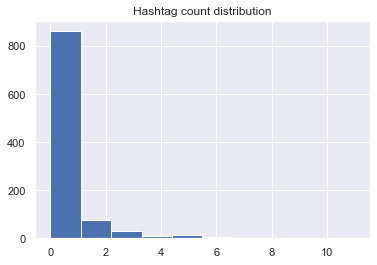

In [21]:
# function that returns number of hashtags in a string
def count_hashtags(string):
    # split the string into words
    words = string.split()
    
    # create a list of words that are hashtags
    hashtags = [word for word in words if word.startswith('#')]
    
    # return number of hashtags
    return(len(hashtags))

# create a feature hashtag_count and display distribution
rtweets_['hashtag_count'] = rtweets_['content'].apply(count_hashtags)

rtweets_['hashtag_count'].hist()
plt.title('Hashtag count distribution')
plt.show()

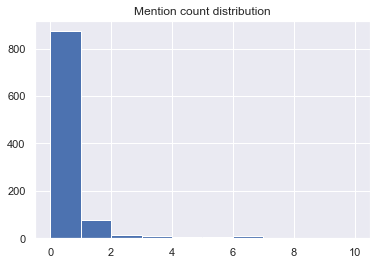

In [22]:
# function that returns number of hashtags in a string
def count_mentions(string):
    # split the string into words
    words = string.split()
    
    # create a list of words that are hashtags
    hashtags = [word for word in words if word.startswith('@')]
    
    # return number of hashtags
    return(len(hashtags))

# create a feature hashtag_count and display distribution
rtweets_['mention_count'] = rtweets_['content'].apply(count_mentions)

rtweets_['mention_count'].hist()
plt.title('Mention count distribution')
plt.show()

# Readability tests

## Readability of 'The Myth of Sisyphus'

For this section, I will be using the `textstat` library instead of `textatistic`.

In [31]:
print(f'Flesch reading score: {textstat.flesch_reading_ease(sisyphus): .2f}')

Flesch reading score:  72.97


The score for this essay is approximately 72.97, which indicates that the essay is at the readability of a 7th grade American student.

## Readability of various publications

In [43]:
# list of excerpts
excerpts = [forbes, harvard, digest, time_kids]

# loop through excerpts and compute gunning fog index
gunning_fogs = []
for excerpt in excerpts:
    gunning_fogs.append(textstat.gunning_fog(excerpt))

print('Gunning Fog Scores:')
for pub, score in zip(publications, gunning_fogs):
    print(f'{pub}: {score}')

Gunning Fog Scores:
forbes: 16.11
harvard_law: 20.52
r_digest: 9.11
time_kids: 9.13


Among the four excerpts, the Harvard Law Review excerpt has the highest Gunning fog index, indicating that it had the hardest readability and may only be comprehended by readers with a college degree.